# Normalisation

Translation contributed by Abhayjit Singh Gulati (211IT085)

Shearing contributed by Sachin Prasanna (211IT058)

Scaling contributed by Rounak Jain (211IT055)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt

In [2]:
img = cv2.imread('assets/input_image.png', 0)

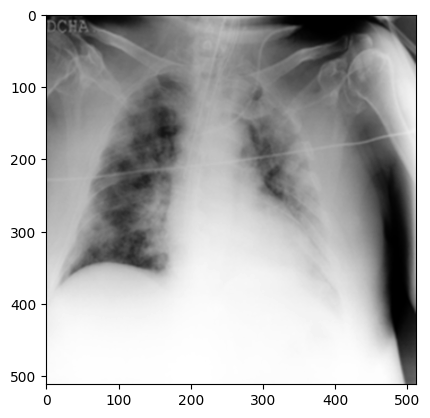

In [3]:
#show the image
plt.imshow(img, cmap='gray', interpolation='bicubic')

In [4]:
#show the matrix image and its size
print(img.shape)
print(img)
print(img.max())
print(img.min())

(512, 512)
[[  5   5   5 ...  88  92  94]
 [  5   5   5 ...  85  89  90]
 [  5   5   5 ...  80  82  83]
 ...
 [251 251 251 ... 104 108 109]
 [251 251 251 ... 106 110 112]
 [251 251 251 ... 107 111 115]]
255
0


In [5]:
# calculate moments
from sympy import symbols, Eq, solve

def findMoments (img):

    #_, bin_img = cv2.threshold(img, 100, 252, cv2.THRESH_BINARY)  #this step can be optional as well. i dont know if this is even neccessary
    moment = cv2.moments(img)

    #create a dictionary to store the information
    variables_dict = {}
    t_alpha = int(moment['m10']/moment['m00'])
    t_beta = int(moment['m01']/moment['m00'])
    mu_03 = moment['mu03']
    mu_12 = moment['mu12']
    mu_21 = moment['mu21']
    mu_30 = moment['mu30']
    mu_11 = moment['mu11']
    mu_20 = moment['mu20']

    b = symbols('b')
    equation = Eq((b**3)*mu_03 + 3*(b**2)*mu_12 + 3*b*mu_21 + mu_30, 0)
    betas = solve(equation, b)

    betas_real = []
    for i in range(len(betas)):
        if np.isreal(betas[i]):
            betas_real.append(betas[i])


    #take the median of betas_real
    beta = betas_real[0]

    lambda_ = mu_11/mu_20

    variables_dict['t_alpha'] = t_alpha
    variables_dict['t_beta'] = t_beta
    variables_dict['beta'] = beta
    variables_dict['lambda'] = lambda_

    return variables_dict


In [6]:
def translate (img, variables_dict):

    t_alpha = variables_dict['t_alpha']
    t_beta = variables_dict['t_beta']

    rows, cols = img.shape
    M = np.float32([[1, 0, t_alpha], [0, 1, t_beta]])
    img_translated = cv2.warpAffine(img, M, (cols, rows))

    return img_translated

In [7]:
def shear(img, variables_dict, direction):

    beta = variables_dict['beta']
    lambda_ = variables_dict['lambda']

    rows, cols = img.shape

    if direction == 'x':
        M = np.float32([[1, beta, 0], [0, 1, 0]])
    elif direction == 'y':
        M = np.float32([[1, 0, 0], [lambda_, 1, 0]])

    img_sheared = cv2.warpAffine(img, M, (cols, rows))

    return img_sheared

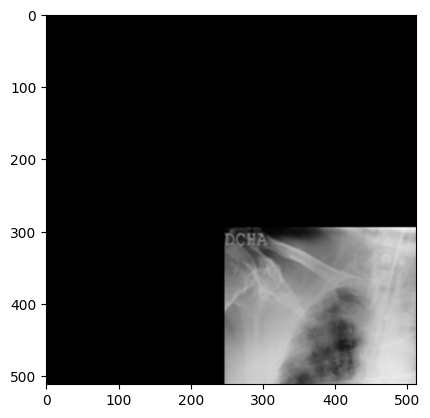

In [8]:
variables_dict = findMoments(img)
img_translated = translate(img, variables_dict)
img_sheared_x = shear(img, variables_dict, 'x')
img_sheared_y = shear(img, variables_dict, 'y')

plt.imshow(img_translated, cmap='gray', interpolation='bicubic')

# save image as normalisation.png
cv2.imwrite('generated_assets/normalisation.png', img_translated)